In [101]:
# import torch
# from PIL import Image
# import open_clip

# model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
# model.eval()  # model in train mode by default, impacts some models with BatchNorm or stochastic depth active
# tokenizer = open_clip.get_tokenizer('ViT-B-32')

# image = preprocess(Image.open("docs/C爱爱6LIP.png")).unsqueeze(0)
# text = tokenizer(["a diagram", "a dog", "a cat"])

# with torch.no_grad(), torch.autocast("cuda"):
#     image_features = model.encode_image(image)
#     text_features = model.encode_text(text)
#     image_features /= image_features.norm(dim=-1, keepdim=True)
#     text_features /= text_features.norm(dim=-1, keepdim=True)

#     text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)

# print("Label probs:", text_probs)  # prints: [[1., 0., 0.]]

In [102]:
import open_clip
open_clip.list_pretrained()

[('RN50', 'openai'),
 ('RN50', 'yfcc15m'),
 ('RN50', 'cc12m'),
 ('RN101', 'openai'),
 ('RN101', 'yfcc15m'),
 ('RN50x4', 'openai'),
 ('RN50x16', 'openai'),
 ('RN50x64', 'openai'),
 ('ViT-B-32', 'openai'),
 ('ViT-B-32', 'laion400m_e31'),
 ('ViT-B-32', 'laion400m_e32'),
 ('ViT-B-32', 'laion2b_e16'),
 ('ViT-B-32', 'laion2b_s34b_b79k'),
 ('ViT-B-32', 'datacomp_xl_s13b_b90k'),
 ('ViT-B-32', 'datacomp_m_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_clip_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_laion_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_image_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_text_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_basic_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_s128m_b4k'),
 ('ViT-B-32', 'datacomp_s_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_clip_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_laion_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_image_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_text_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_basic_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_s13m_b4k'),
 ('ViT-

In [103]:
import numpy as np
import pandas as pd

In [104]:
# pretrained also accepts local paths
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k') 

In [105]:
model.eval()
#token 数
context_length = model.context_length
#clip可以识别的唯一单词或符号的数量。
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 151,277,313
Context length: 77
Vocab size: 49408


In [106]:
preprocess

Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    <function _convert_to_rgb at 0x00000237172E1440>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

In [107]:
from open_clip import tokenizer

In [108]:
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# images in skimage to use and their textual descriptions
descriptions = {
     "motorcycle_right": "a red motorcycle standing in a garage",
    "grass": "A lush ground cover composed of small blades, commonly found in fields and lawns.",
    "coins": "A collection of metallic currency pieces.",
    "color": "A color wheel made up of various colors",
     "page": "a page of text about segmentation",
    "retina": "a layer of cells lining the back wall inside the eye",
    "coffee": "a cup of coffee on a saucer",
     "horse": "a black-and-white silhouette of a horse"
}

In [109]:
print(dir(skimage.data))

['astronaut', 'binary_blobs', 'brain', 'brick', 'camera', 'cat', 'cell', 'cells3d', 'checkerboard', 'chelsea', 'clock', 'coffee', 'coins', 'colorwheel', 'data_dir', 'download_all', 'eagle', 'file_hash', 'grass', 'gravel', 'horse', 'hubble_deep_field', 'human_mitosis', 'immunohistochemistry', 'kidney', 'lbp_frontal_face_cascade_filename', 'lfw_subset', 'lily', 'logo', 'microaneurysms', 'moon', 'nickel_solidification', 'page', 'palisades_of_vogt', 'protein_transport', 'retina', 'rocket', 'shepp_logan_phantom', 'skin', 'stereo_motorcycle', 'text', 'vortex']


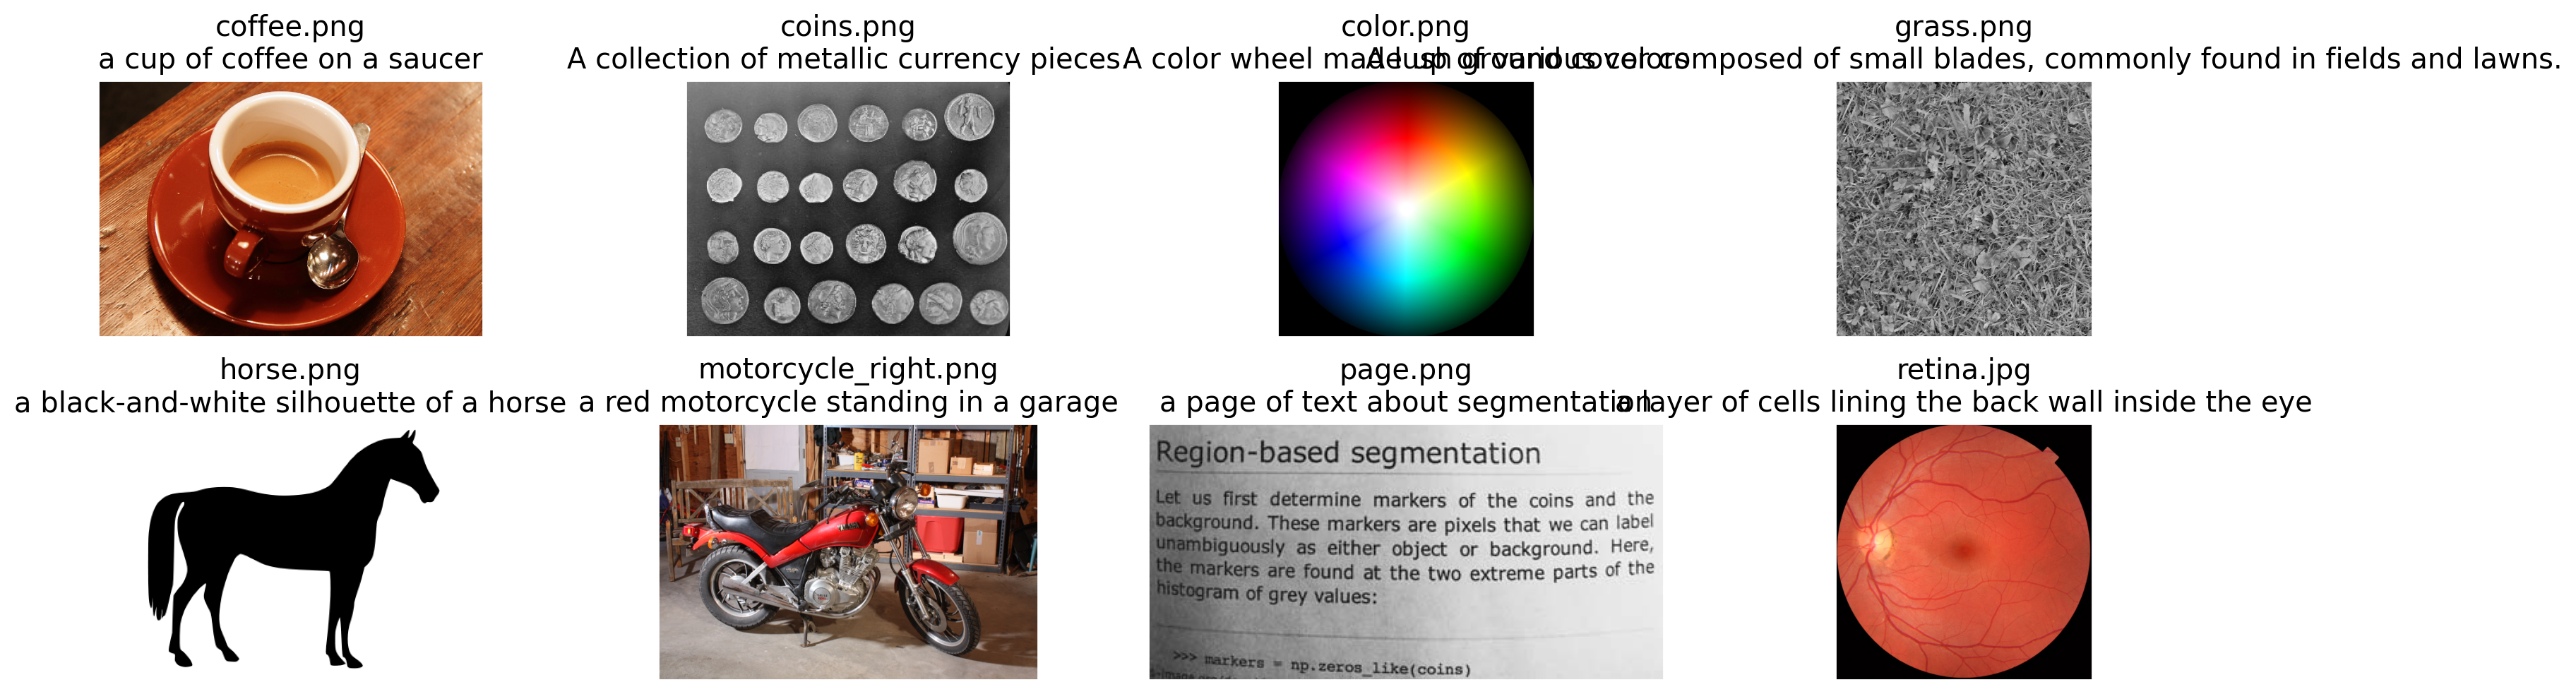

In [110]:
original_images = []
images = []
texts = []
plt.figure(figsize=(16, 5))

for filename in [filename for filename in os.listdir(skimage.data_dir) if filename.endswith(".png") or filename.endswith(".jpg")]:
    name = os.path.splitext(filename)[0]
    if name not in descriptions:
        continue

    image = Image.open(os.path.join(skimage.data_dir, filename)).convert("RGB")
  
    plt.subplot(2, 4, len(images) + 1)
    plt.imshow(image)
    plt.title(f"{filename}\n{descriptions[name]}")
    plt.xticks([])
    plt.yticks([])

    original_images.append(image)
    images.append(preprocess(image))
    texts.append(descriptions[name])

plt.tight_layout()

In [111]:
image_input = torch.tensor(np.stack(images))
text_tokens = tokenizer.tokenize(["This is " + desc for desc in texts])

In [112]:
with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float()

In [113]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

Text(0.5, 1.0, 'Cosine similarity between text and image features')

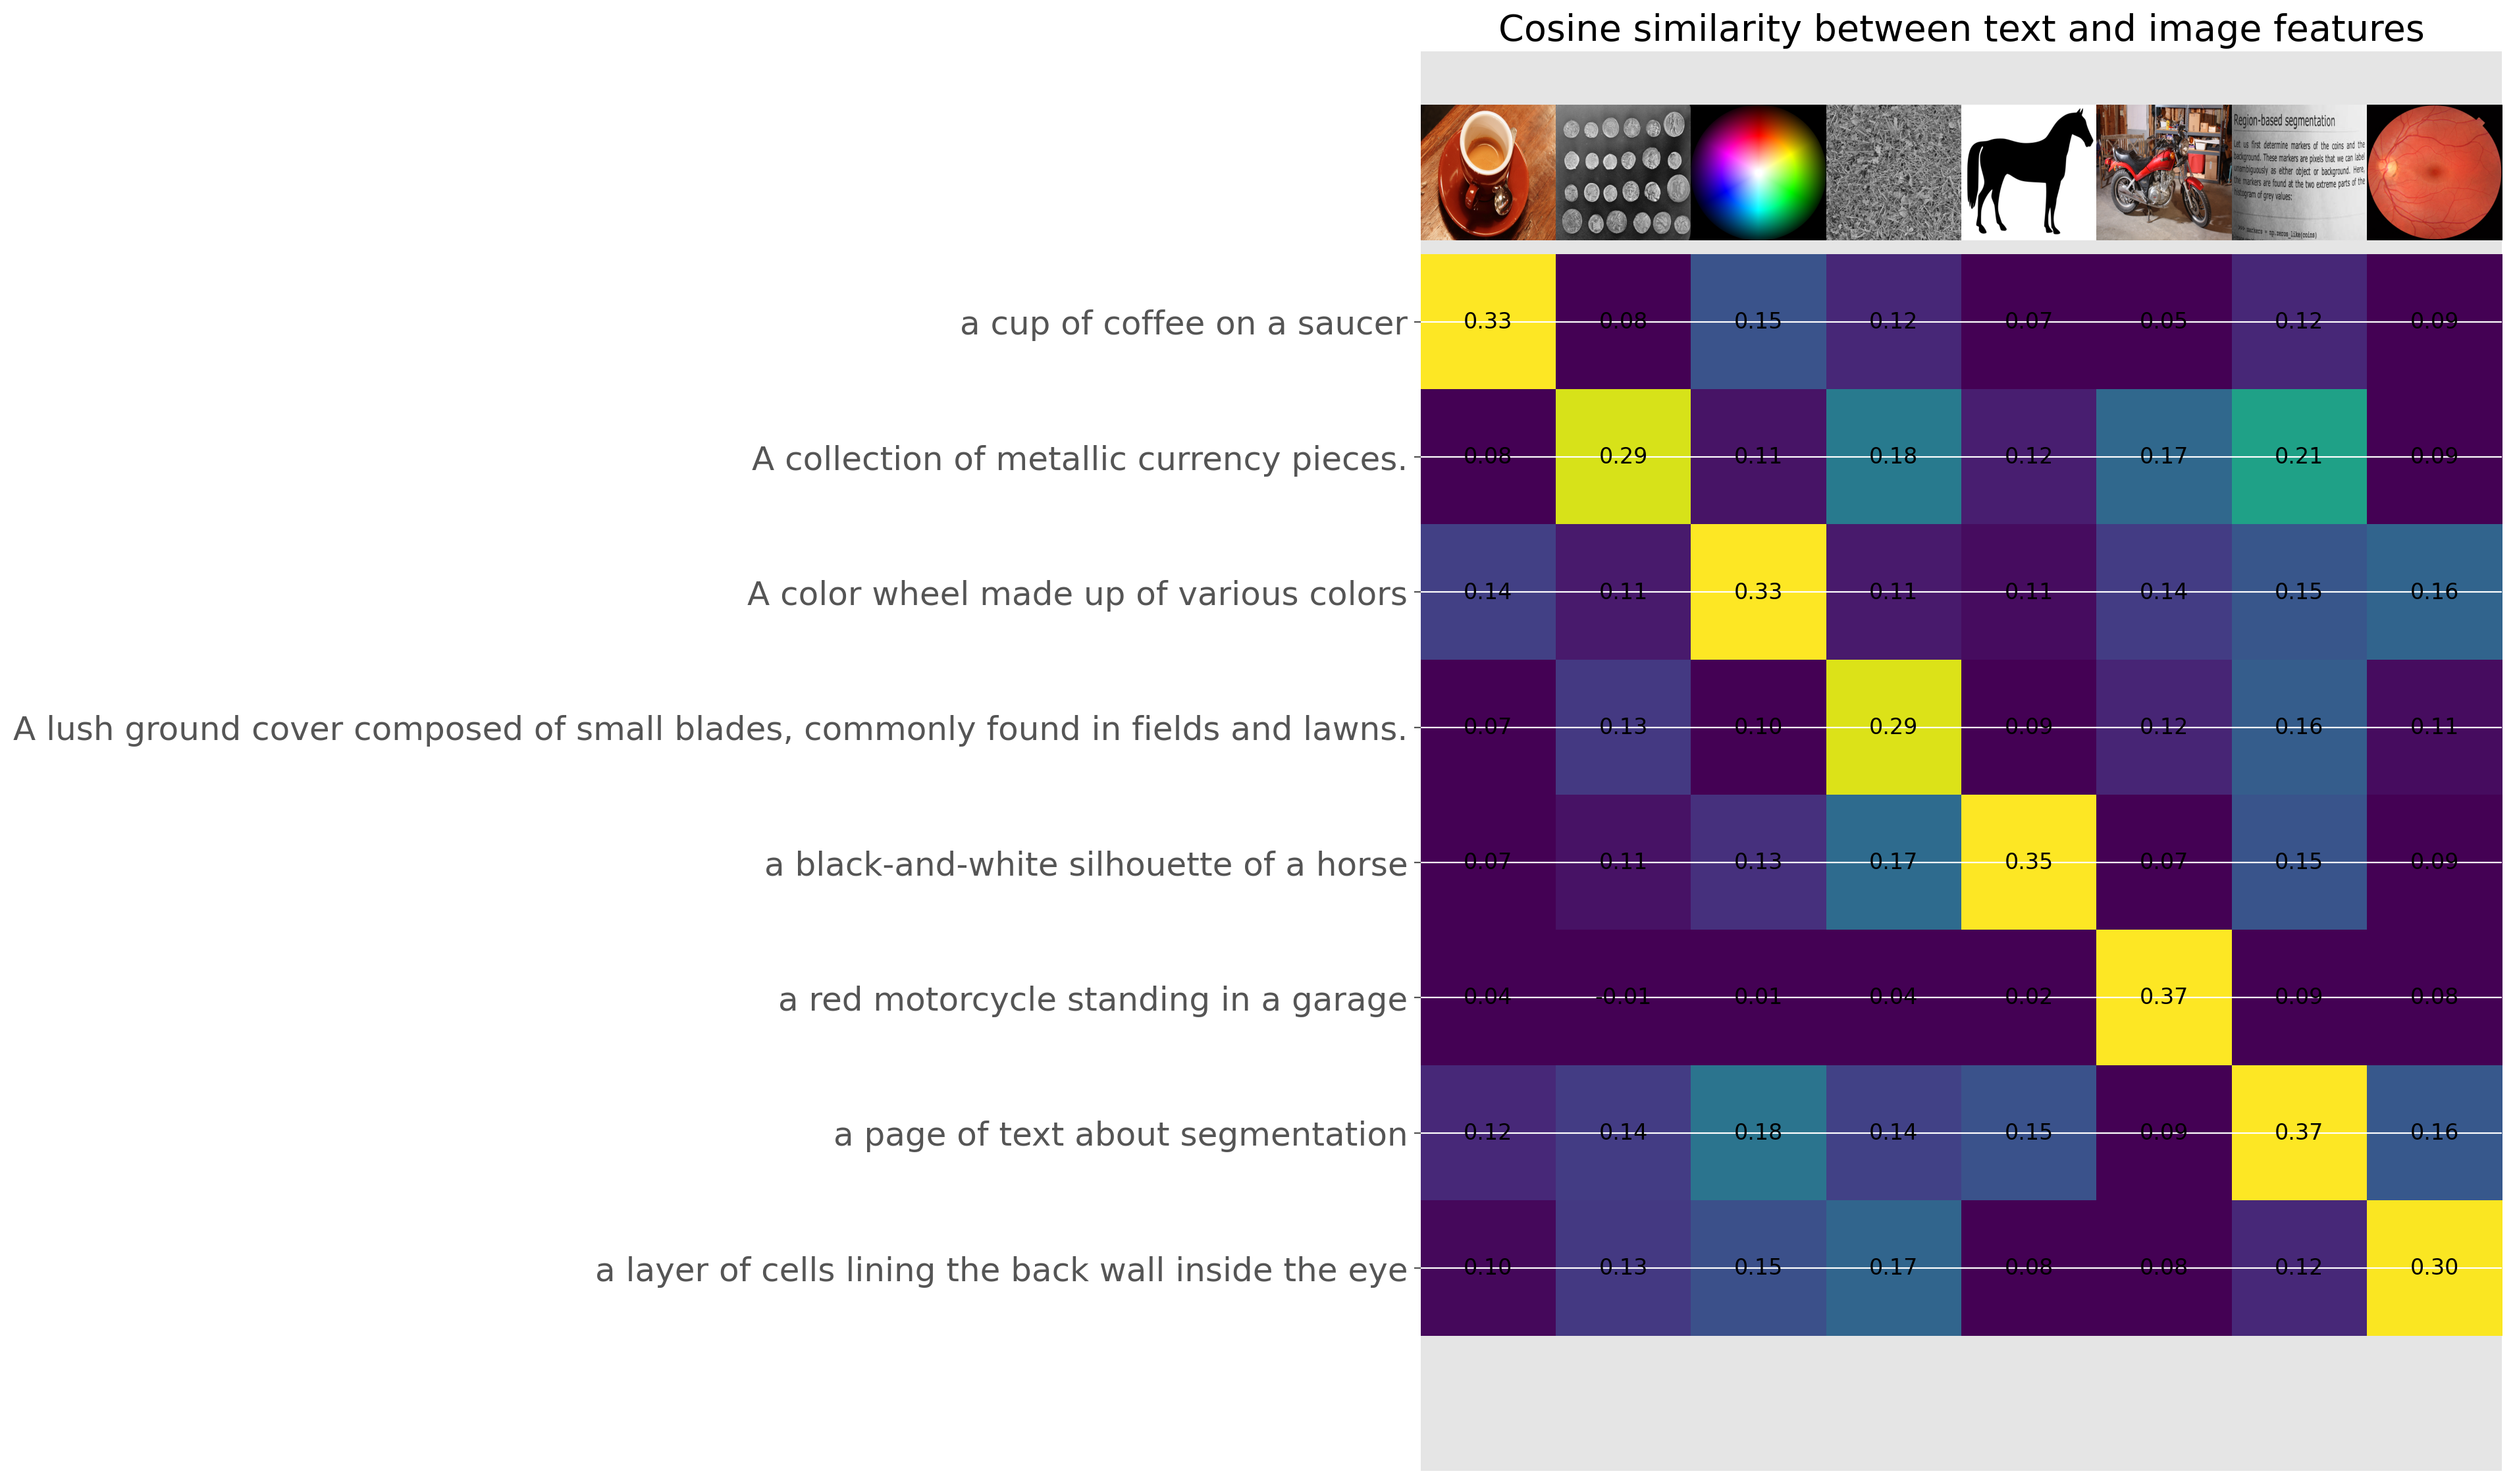

In [114]:
count = len(descriptions)

plt.figure(figsize=(20, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.3)
# plt.colorbar()
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])
for i, image in enumerate(original_images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

plt.title("Cosine similarity between text and image features", size=20)

In [115]:
from torchvision.datasets import CIFAR100

cifar100 = CIFAR100(os.path.expanduser("~/.cache"), transform=preprocess, download=True)

In [116]:
preprocess

Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    <function _convert_to_rgb at 0x00000237172E1440>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

In [117]:
text_descriptions = [f"A photo of a {label}" for label in cifar100.classes]
text_tokens = tokenizer.tokenize(text_descriptions)

In [118]:
with torch.no_grad():
    text_features = model.encode_text(text_tokens).float()
    text_features /= text_features.norm(dim=-1, keepdim=True)

text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
top_probs, top_labels = text_probs.cpu().topk(5, dim=-1)

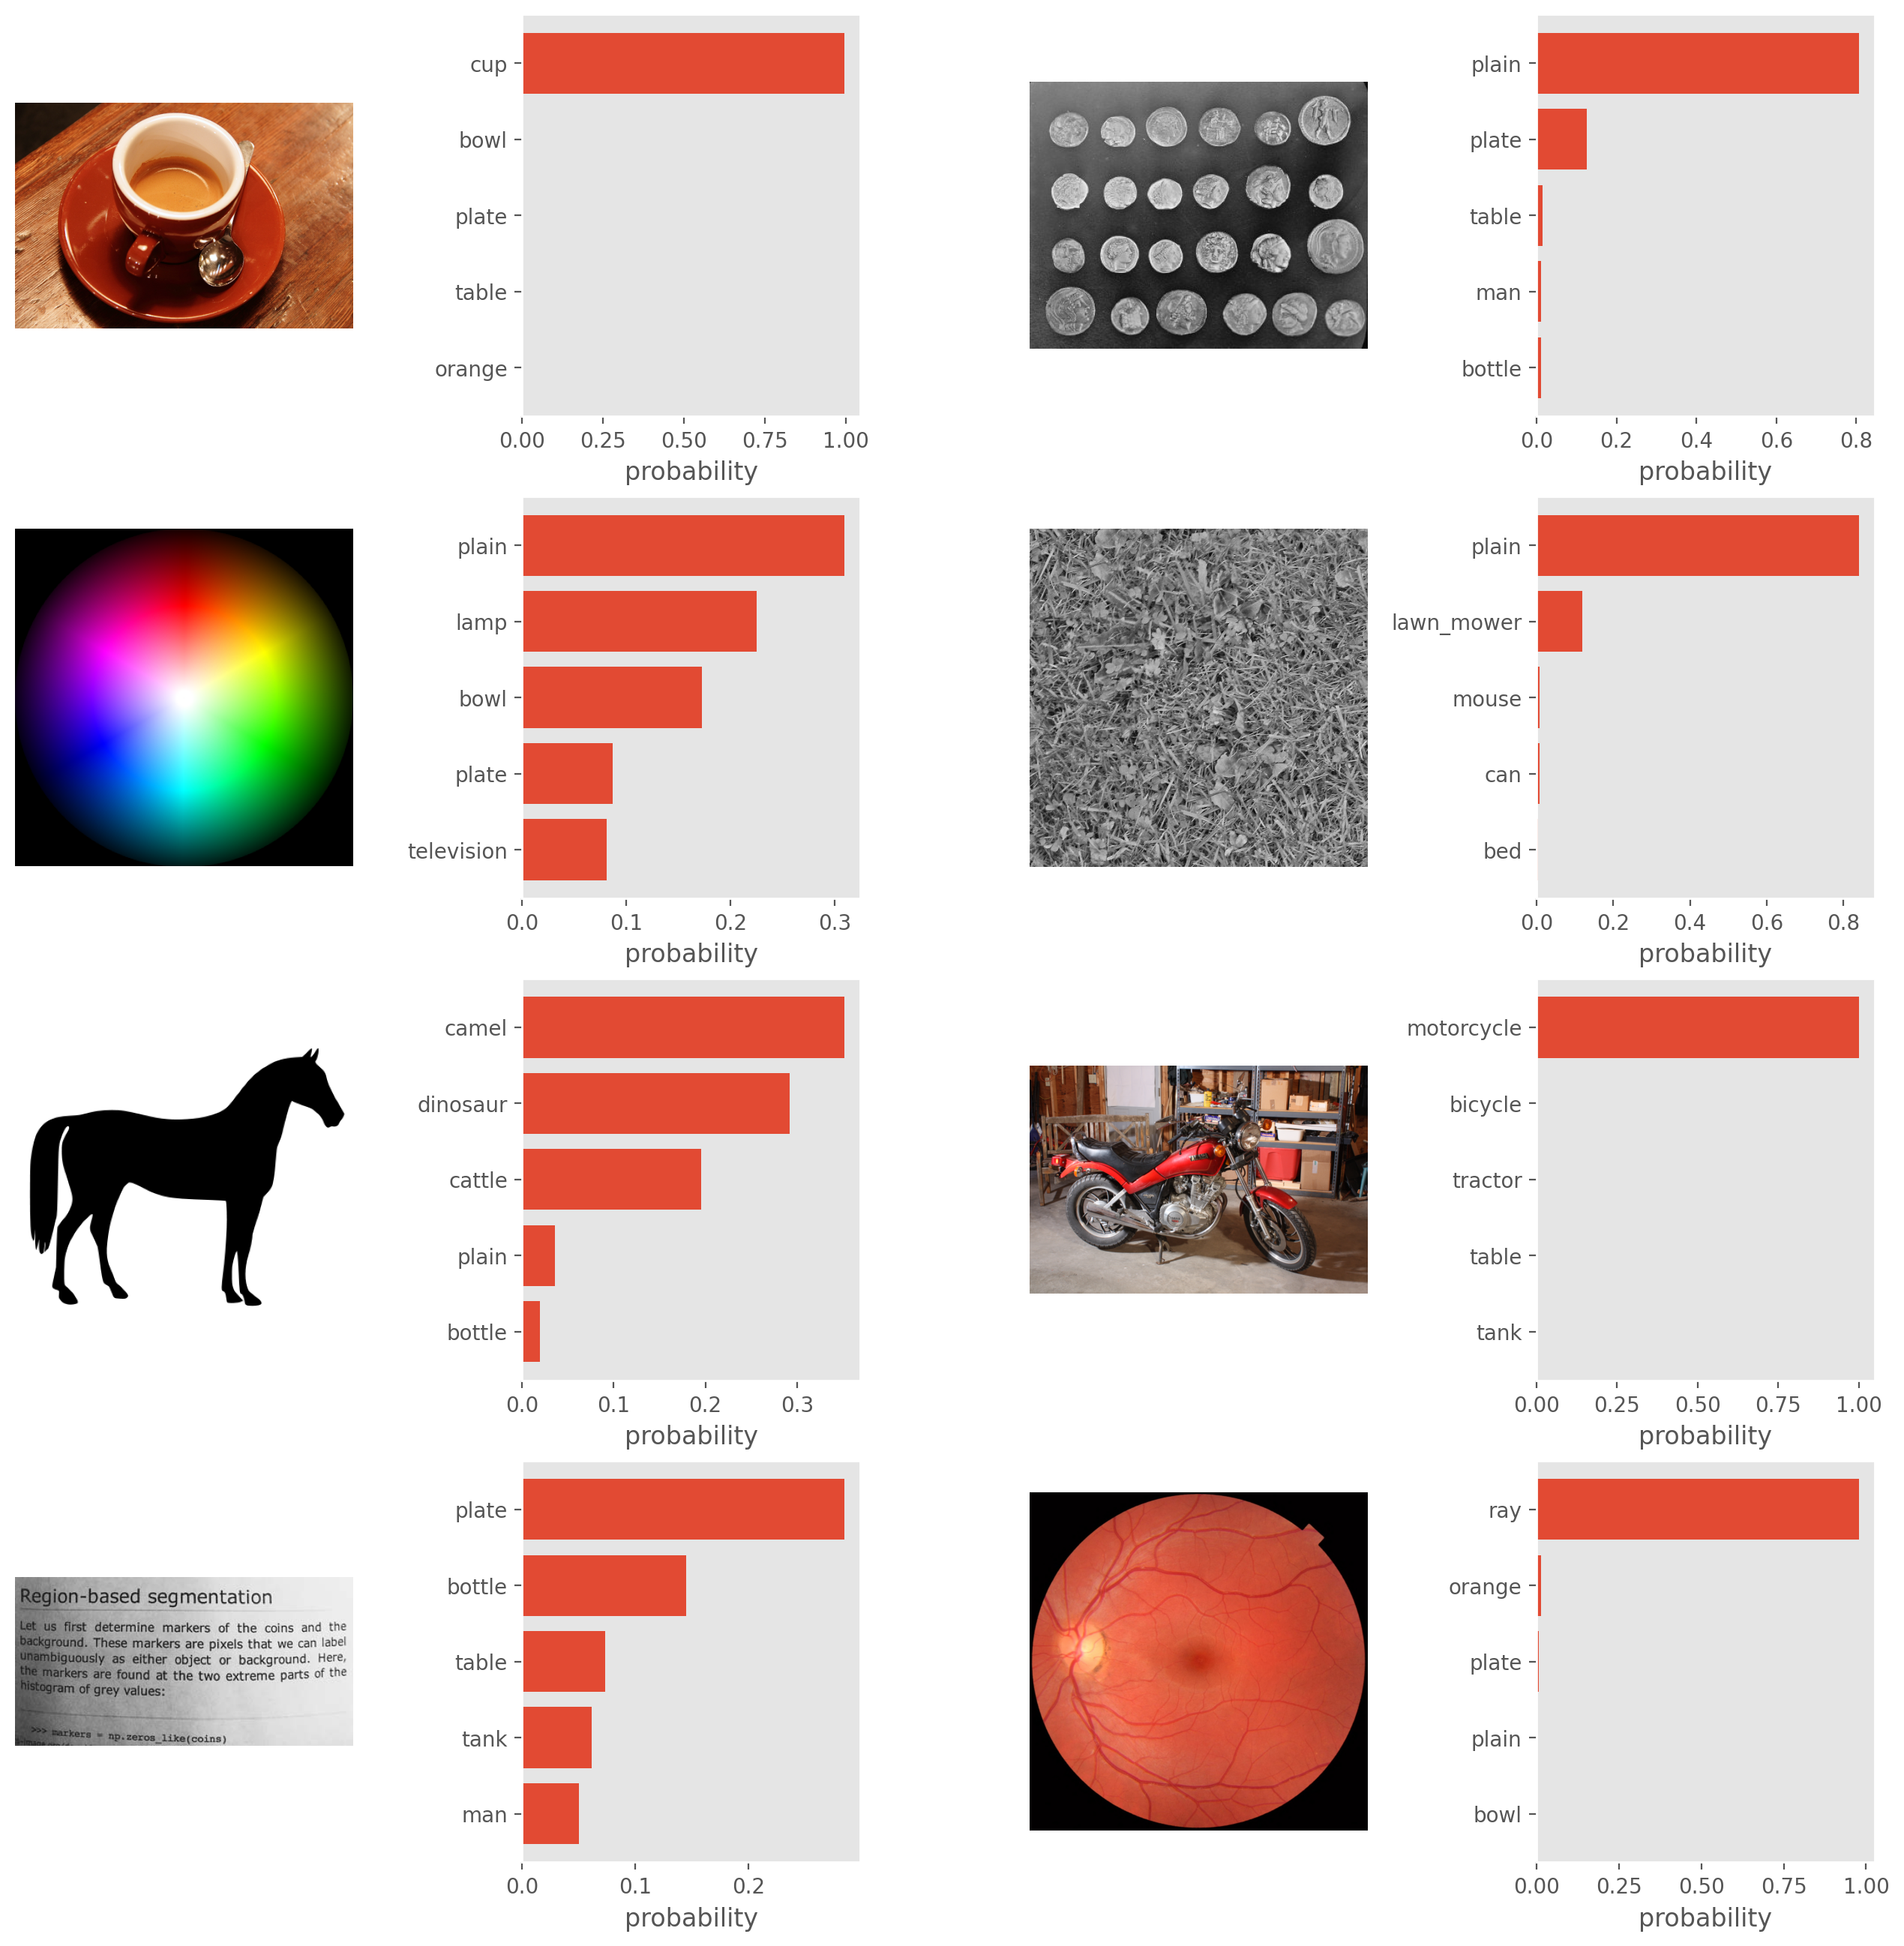

In [119]:
plt.figure(figsize=(16, 16))

for i, image in enumerate(original_images):
    plt.subplot(4, 4, 2 * i + 1)
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(4, 4, 2 * i + 2)
    y = np.arange(top_probs.shape[-1])
    plt.grid()
    plt.barh(y, top_probs[i])
    plt.gca().invert_yaxis()
    plt.gca().set_axisbelow(True)
    plt.yticks(y, [cifar100.classes[index] for index in top_labels[i].numpy()])
    plt.xlabel("probability")

plt.subplots_adjust(wspace=0.5)
plt.show()

In [120]:
image_input = torch.tensor(np.stack(images))
text_tokens = tokenizer.tokenize(["This is " + desc for desc in texts])
with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float()
    image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

# Calibration

In [122]:
# Calibration methods including Temperature Scaling

import numpy as np
from scipy.optimize import minimize 
from sklearn.metrics import log_loss
import pandas as pd
import time
from sklearn.metrics import log_loss, brier_score_loss
from keras.losses import categorical_crossentropy
from os.path import join
import sklearn.metrics as metrics

## load data

In [124]:
#将CIFAR1000数据集分成train和test
cifar100_train_dataset = CIFAR100(root='./cifar10_data', train=True, download=True, transform=None)
cifar100_test_dataset = CIFAR100(root='./cifar10_data', train=False, download=True, transform=None)
cifar100_train_data = cifar100_train_dataset.data
cifar100_test_data = cifar100_test_dataset.data
cifar100_train_labels = np.array(cifar100_train_dataset.targets)
cifar100_test_labels = np.array(cifar100_test_dataset.targets)
cifar100_train_data.shape, cifar100_test_data.shape, cifar100_train_labels.shape, cifar100_test_labels.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000,), (10000,))

(32, 32, 3) <class 'numpy.ndarray'>
(32, 32, 3) <class 'PIL.Image.Image'>


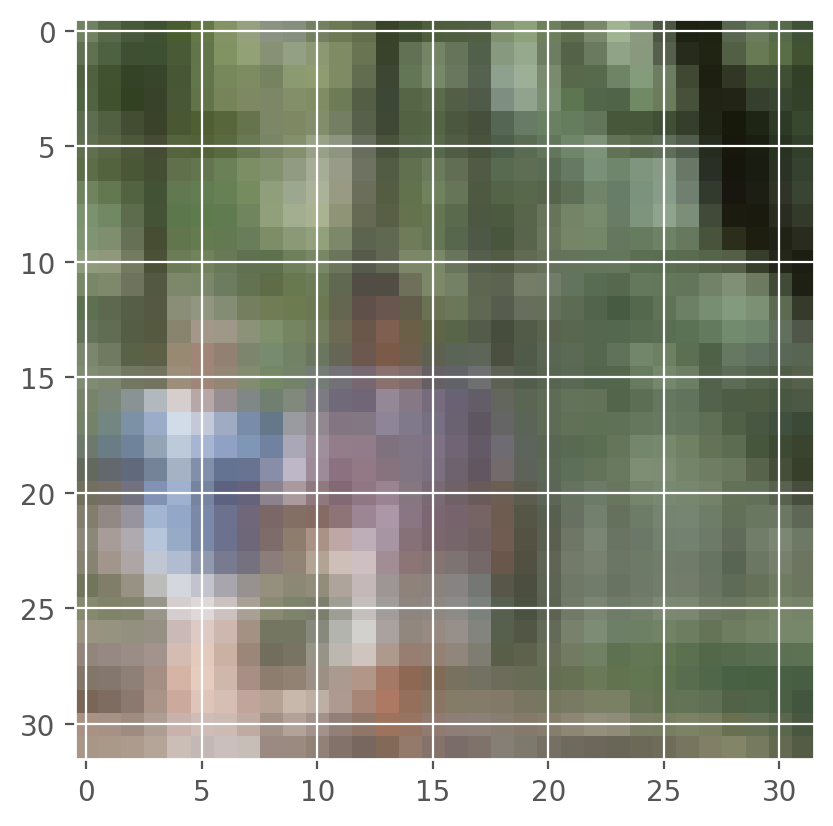

In [125]:
img = cifar100_test_data[1]
print(img.shape, type(img))
plt.imshow(img)
im = Image.fromarray(img, mode="RGB")
print(img.shape, type(im))
im_prep = preprocess(im).unsqueeze(0)
im_prep.shape
with torch.no_grad():
    image_features = model.encode_image(im_prep)


In [126]:
# 文件名: extract_logits_from_preprocessed_cifar100_small.py


import torch
import numpy as np
import pickle
import os
from os.path import join
from tqdm import tqdm
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import Dataset, Subset


device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device).eval()


# ============ 包装 Dataset，确保图像转为 Tensor ============
class TensorizedDataset(Dataset):
    def __init__(self, base_dataset):
        self.base_dataset = base_dataset
        self.to_tensor = transforms.ToTensor()


    def __getitem__(self, index):
        img, label = self.base_dataset[index]
        if isinstance(img, np.ndarray):
            img = Image.fromarray(img)
        if isinstance(img, Image.Image):
            img = self.to_tensor(img)
        return img, label


    def __len__(self):
        return len(self.base_dataset)


    @property
    def targets(self):
        return self.base_dataset.targets


# 包装原始 Dataset
cifar100_train_dataset = TensorizedDataset(cifar100_train_dataset)
cifar100_test_dataset = TensorizedDataset(cifar100_test_dataset)


# ============ 文本特征 ============
print("提取文本特征中...")
text_descriptions = [f"A photo of a {label}" for label in cifar100.classes]
text_tokens = tokenizer.tokenize(text_descriptions).to(device)


with torch.no_grad():
    text_features = model.encode_text(text_tokens).float()
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)
text_features_np = text_features.cpu().numpy()


# # ============ 获取每个 dataset 的 1/100 子集 ============
# small_train_dataset = Subset(cifar100_train_dataset, list(range(len(cifar100_train_dataset) // 100)))
# small_test_dataset = Subset(cifar100_test_dataset, list(range(len(cifar100_test_dataset) // 100)))


# ============ 提取图像特征 ============
import torch.nn.functional as F
def extract_features(dataset, name=""):
    features = []
    for img_tensor, _ in tqdm(dataset, desc=f"[{name}] 提取图像特征"):
        resized = F.interpolate(img_tensor.unsqueeze(0), size=(224, 224), mode='bilinear', align_corners=False)
        img_input = resized.to(device)
        with torch.no_grad():
            image_feature = model.encode_image(img_input).float()
            image_feature = image_feature / image_feature.norm(dim=-1, keepdim=True)
        features.append(image_feature.squeeze(0).cpu())
    return torch.stack(features).numpy()


train_features = extract_features(cifar100_train_dataset, "训练集")
test_features = extract_features(cifar100_test_dataset, "测试集")


# ============ 标签 ============
train_labels = np.array([cifar100_train_dataset[i][1] for i in range(len(cifar100_train_dataset))]).reshape(-1, 1)
test_labels = np.array([cifar100_test_dataset[i][1] for i in range(len(cifar100_test_dataset))]).reshape(-1, 1)


# ============ 计算 logits ============
print("计算 logits...")
temperature = 100.0
train_logits = temperature * train_features @ text_features_np.T
test_logits = temperature * test_features @ text_features_np.T


# ============ 保存为指定格式 ============
output_data = ((train_logits, train_labels), (test_logits, test_labels))
output_dir = "logits_debug"
os.makedirs(output_dir, exist_ok=True)
save_path = join(output_dir, "probs_vit_b32_c100_logits_debug.p")


with open(save_path, "wb") as f:
    pickle.dump(output_data, f)


print(f"✅ zong样本测试完成，结果保存在：{save_path}")

提取文本特征中...


[测试集] 提取图像特征: 100%|██████████| 10000/10000 [05:36<00:00, 29.68it/s]


计算 logits...
✅ zong样本测试完成，结果保存在：logits_debug\probs_vit_b32_c100_logits_debug.p


In [127]:
# ============ 标签 ============
train_labels = np.array([cifar100_train_dataset[i][1] for i in range(len(cifar100_train_dataset))]).reshape(-1, 1)
test_labels = np.array([cifar100_test_dataset[i][1] for i in range(len(cifar100_test_dataset))]).reshape(-1, 1)


# ============ 计算 logits ============
print("计算 logits...")
temperature = 100.0
train_logits = temperature * train_features @ text_features_np.T
test_logits = temperature * test_features @ text_features_np.T


# ============ 保存为指定格式 ============
output_data = ((train_logits, train_labels), (test_logits, test_labels))
output_dir = "logits_debug"
os.makedirs(output_dir, exist_ok=True)
save_path = join(output_dir, "probs_vit_b32_c100_logits_debug.p")


with open(save_path, "wb") as f:
    pickle.dump(output_data, f)

print(f"✅ 大样本测试完成，结果保存在：{save_path}")

计算 logits...
✅ 大样本测试完成，结果保存在：logits_debug\probs_vit_b32_c100_logits_debug.p


In [128]:
import pickle
import numpy as np
import os

input_path = "logits_debug/probs_vit_b32_c100_logits_debug.p"
output_path = "logits_debug/probs_vit_b32_c2_logits_debug.p"

# 读取原始 logits 和标签
with open(input_path, "rb") as f:
    (logits_train, labels_train), (logits_test, labels_test) = pickle.load(f)

# 将标签拉平（从 shape (N, 1) → (N,)）
labels_train = labels_train.squeeze()
labels_test = labels_test.squeeze()

# 选择标签为 0 或 1 的样本索引
train_idx = np.where(np.isin(labels_train, [0, 1]))[0]
test_idx = np.where(np.isin(labels_test, [0, 1]))[0]

# 子集化 logits 和标签
logits_train_c2 = logits_train[train_idx][:, [0, 1]]
labels_train_c2 = labels_train[train_idx].reshape(-1, 1)

logits_test_c2 = logits_test[test_idx][:, [0, 1]]
labels_test_c2 = labels_test[test_idx].reshape(-1, 1)

# 重新打包并保存
output_data_c2 = ((logits_train_c2, labels_train_c2), (logits_test_c2, labels_test_c2))

with open(output_path, "wb") as f:
    pickle.dump(output_data_c2, f)

print(f"✅ 二分类版本保存完成！路径：{output_path}")


✅ 二分类版本保存完成！路径：logits_debug/probs_vit_b32_c2_logits_debug.p


In [129]:
import numpy as np
import pandas as pd
from betacal import BetaCalibration
from os.path import join
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression
from cal_methods import HistogramBinning, TemperatureScaling, evaluate, cal_results

### Isotonic Regression

In [131]:
PATH = "logits_debug"

files = ('probs_vit_b32_c2_logits_debug.p',)

df_iso = cal_results(
    IsotonicRegression, 
    PATH, 
    files, 
    m_kwargs={'y_min': 0, 'y_max': 1}, 
    approach="single"
)


vit_b32_c2_logits
Accuracy: 89.0
Error: 11.0
ECE: 0.06661638617515563
MCE: 0.43145130077997845
LogLoss: 0.24325156960424776
Brier: 0.5723015363628456
Error 4.900000; ece 0.000009; mce 0.000014; loss 0.262400, brier 0.238678
Time taken: 0.009663105010986328 

Total time taken: 0.009663105010986328


### Temperature scaling

In [133]:
df_temp_scale = cal_results(TemperatureScaling, PATH, files, approach = "all")

vit_b32_c2_logits
Accuracy: 89.0
Error: 11.0
ECE: 0.06661638617515563
MCE: 0.43145130077997845
LogLoss: 0.24325156960424776
Brier: 0.5723015363628456
Error 10.700000; ece 0.028290; mce 0.174632; loss 0.203421, brier 0.547888
Time taken: 0.028115034103393555 

Total time taken: 0.028115034103393555


### Beta methods

In [135]:
df_beta = cal_results(BetaCalibration, PATH, files, {'parameters':"abm"}, approach = "single")

vit_b32_c2_logits
Accuracy: 89.0
Error: 11.0
ECE: 0.06661638617515563
MCE: 0.43145130077997845
LogLoss: 0.24325156960424776
Brier: 0.5723015363628456
Error 3.100000; ece 0.006893; mce 0.346782; loss 0.072083, brier 0.478407
Time taken: 0.0321958065032959 

Total time taken: 0.0321958065032959


In [136]:
df_beta_am = cal_results(BetaCalibration, PATH, files, {'parameters':"am"}, approach = "single")

vit_b32_c2_logits
Accuracy: 89.0
Error: 11.0
ECE: 0.06661638617515563
MCE: 0.43145130077997845
LogLoss: 0.24325156960424776
Brier: 0.5723015363628456
Error 2.700000; ece 0.010608; mce 0.326167; loss 0.074561, brier 0.478225
Time taken: 0.013674259185791016 

Total time taken: 0.013674259185791016


In [137]:
df_beta_ab = cal_results(BetaCalibration, PATH, files, {'parameters':"ab"}, approach = "single")

vit_b32_c2_logits
Accuracy: 89.0
Error: 11.0
ECE: 0.06661638617515563
MCE: 0.43145130077997845
LogLoss: 0.24325156960424776
Brier: 0.5723015363628456
Error 10.700000; ece 0.053081; mce 0.386357; loss 0.182999, brier 0.527278
Time taken: 0.020128250122070312 

Total time taken: 0.020128250122070312


### Histogram binning

In [139]:
df_hb = cal_results(HistogramBinning, PATH, files, {'M':15}, approach = "single")

vit_b32_c2_logits
Accuracy: 89.0
Error: 11.0
ECE: 0.06661638617515563
MCE: 0.43145130077997845
LogLoss: 0.24325156960424776
Brier: 0.5723015363628456
Error 3.600000; ece 0.000000; mce 0.000000; loss 0.129394, brier 0.467198
Time taken: 0.02818894386291504 

Total time taken: 0.02818894386291504


## Dataframe with results


In [141]:
dfs = [df_hb, df_iso, df_temp_scale, df_beta, df_beta_am, df_beta_ab]
names = ["Name", "Uncalibrated", "Histogram Binning", "Isotonic Regression", "Temperature Scaling", "Beta Calibration",
        "BC am", "BC ab"]


def get_dataframe(dfs, column, names):

    df_res = pd.DataFrame(columns=names)

    for i in range(1, len(df_iso), 2):

        name = dfs[0].iloc[i-1]["Name"] # Get name of method
        uncalibrated = dfs[0].iloc[i-1][column]  # Get uncalibrated score

        row = [name, uncalibrated]  # Add scores to row

        for df in dfs:
            row.append(df.iloc[i][column])

        df_res.loc[(i-1)//2] = row
        #errordf.iloc[i]
    
    df_res.set_index('Name', inplace = True)
        
    return df_res

In [142]:
df_ece = get_dataframe(dfs, "ECE", names)
df_mce = get_dataframe(dfs, "MCE", names)
df_loss = get_dataframe(dfs, "Loss", names)

## Scores

In [144]:
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

### ECE

In [206]:
df_ece.style.apply(highlight_min, axis = 1)

### MCE

In [210]:
df_mce.style.apply(highlight_min, axis = 1)

# Conduct Reliability Diagram

In [146]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from os.path import join

from cal_methods import HistogramBinning, TemperatureScaling
from betacal import BetaCalibration
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression

### Imports to get "utility" package

In [148]:
import sys
from os import path
sys.path.append( path.dirname( path.dirname( path.abspath("utility") ) ) )
from utility.unpickle_probs import unpickle_probs
from utility.evaluation import get_bin_info, softmax

In [149]:
PATH = join('logits_debug')
files = ('probs_vit_b32_c100_logits_debug.p',)

## Reliability diagrams as subgraph

In [151]:
# reliability diagram plotting for subplot case.
def rel_diagram_sub(accs, confs, ax, M = 10, name = "Reliability Diagram", xname = "", yname=""):

    acc_conf = np.column_stack([accs,confs])
    acc_conf.sort(axis=1)
    outputs = acc_conf[:, 0]
    gap = acc_conf[:, 1]

    bin_size = 1/M
    positions = np.arange(0+bin_size/2, 1+bin_size/2, bin_size)

    # Plot gap first, so its below everything
    gap_plt = ax.bar(positions, gap, width = bin_size, edgecolor = "red", color = "red", alpha = 0.3, label="Gap", linewidth=2, zorder=2)

    # Next add error lines
    #for i in range(M):
        #plt.plot([i/M,1], [0, (M-i)/M], color = "red", alpha=0.5, zorder=1)

    #Bars with outputs
    output_plt = ax.bar(positions, outputs, width = bin_size, edgecolor = "black", color = "blue", label="Outputs", zorder = 3)

    # Line plot with center line.
    ax.set_aspect('equal')
    ax.plot([0,1], [0,1], linestyle = "--")
    ax.legend(handles = [gap_plt, output_plt])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_title(name, fontsize=24)
    ax.set_xlabel(xname, fontsize=22, color = "black")
    ax.set_ylabel(yname, fontsize=22, color = "black")

In [152]:
def get_pred_conf(y_probs, normalize = False):
    
    y_preds = np.argmax(y_probs, axis=1)  # Take maximum confidence as prediction
    
    if normalize:
        y_confs = np.max(y_probs, axis=1)/np.sum(y_probs, axis=1)
    else:
        y_confs = np.max(y_probs, axis=1)  # Take only maximum confidence
        
    return y_preds, y_confs

## Calibration methods for both 1-vs-rest and mutliclass approach

In [154]:
# TODO add into scripts
def cal_res(method, path, file, M = 15, name = "", approach = "single", m_kwargs = {}):
    
    bin_size = 1/M

    FILE_PATH = join(path, file)
    (y_logits_val, y_val), (y_logits_test, y_test) = unpickle_probs(FILE_PATH)

    y_probs_val = softmax(y_logits_val)  # Softmax logits
    y_probs_test = softmax(y_logits_test)
    
    if approach == "single":
        
        K = y_probs_test.shape[1]

        # Go through all the classes
        for k in range(K):
            # Prep class labels (1 fixed true class, 0 other classes)
            y_cal = np.array(y_val == k, dtype="int")[:, 0]

            # Train model
            model = method(**m_kwargs)
            model.fit(y_probs_val[:, k], y_cal) # Get only one column with probs for given class "k"

            y_probs_val[:, k] = model.predict(y_probs_val[:, k])  # Predict new values based on the fittting
            y_probs_test[:, k] = model.predict(y_probs_test[:, k])

            # Replace NaN with 0, as it should be close to zero  # TODO is it needed?
            idx_nan = np.where(np.isnan(y_probs_test))
            y_probs_test[idx_nan] = 0

            idx_nan = np.where(np.isnan(y_probs_val))
            y_probs_val[idx_nan] = 0
            
            y_preds_val, y_confs_val = get_pred_conf(y_probs_val, normalize = True)
            y_preds_test, y_confs_test = get_pred_conf(y_probs_test, normalize = True)
    
    else:
        model = method(**m_kwargs)
        model.fit(y_logits_val, y_val)

        y_probs_val = model.predict(y_logits_val) 
        y_probs_test = model.predict(y_logits_test)

        y_preds_val, y_confs_val = get_pred_conf(y_probs_val, normalize = False)
        y_preds_test, y_confs_test = get_pred_conf(y_probs_test, normalize = False)
    

    
    accs_val, confs_val, len_bins_val = get_bin_info(y_confs_val, y_preds_val, y_val, bin_size = bin_size)
    accs_test, confs_test, len_bins_test = get_bin_info(y_confs_test, y_preds_test, y_test, bin_size = bin_size)
    
    return (accs_test, confs_test, len_bins_test), (accs_val, confs_val, len_bins_val)
    

In [155]:
def get_uncalibrated_res(path, file, M = 15):
    
    bin_size = 1/M

    FILE_PATH = join(path, file)
    (y_logits_val, y_val), (y_logits_test, y_test) = unpickle_probs(FILE_PATH)

    y_probs_test = softmax(y_logits_test)
    y_preds_test, y_confs_test = get_pred_conf(y_probs_test, normalize = False)
    
    return get_bin_info(y_confs_test, y_preds_test, y_test, bin_size = bin_size)

In [156]:
import pickle

def gen_plots(files, plot_names =  [], M = 15, val_set = False):
    
    if val_set:  # Plot Reliability diagrams for validation set
        k = 1
    else:
        k = 0

    for i, file in enumerate(files):
        
        bin_info_uncal = get_uncalibrated_res(PATH, file, M)

        accs_confs = []

        accs_confs.append(cal_res(TemperatureScaling, PATH, file, M, "", "multi"))
        accs_confs.append(cal_res(HistogramBinning, PATH, file, M, "", "single", {'M':M}))
        accs_confs.append(cal_res(IsotonicRegression, PATH, file, M, "", "single", {'y_min':0, 'y_max':1}))
        accs_confs.append(cal_res(BetaCalibration, PATH, file, M, "", "single", {'parameters':"abm"}))
        
        with open(plot_names[i] + "_bin_info.p", "wb") as f:
            pickle.dump(accs_confs, f)

        plt.style.use('ggplot')
        fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(22.5, 4), sharex='col', sharey='row')
        names = [" (Uncal)", " (Temp)", " (Histo)", " (Iso)", " (Beta)"]
        
        # Uncalibrated information
        rel_diagram_sub(bin_info_uncal[0], bin_info_uncal[1], ax[0] , M = M, name = "\n".join(plot_names[i].split()) + names[0], xname="Confidence")

        for j in range(4):
            rel_diagram_sub(accs_confs[j][k][0], accs_confs[j][k][1], ax[j+1] , M = M, name = "\n".join(plot_names[i].split()) + names[j+1], xname="Confidence")

        ax[0].set_ylabel("Accuracy", color = "black")
        
        for ax_temp in ax:    
            plt.setp(ax_temp.get_xticklabels(), rotation='horizontal', fontsize=18)
            plt.setp(ax_temp.get_yticklabels(), fontsize=18)

        plt.savefig("_".join(plot_names[i].split()) + ".pdf", format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.2)
        plt.show()

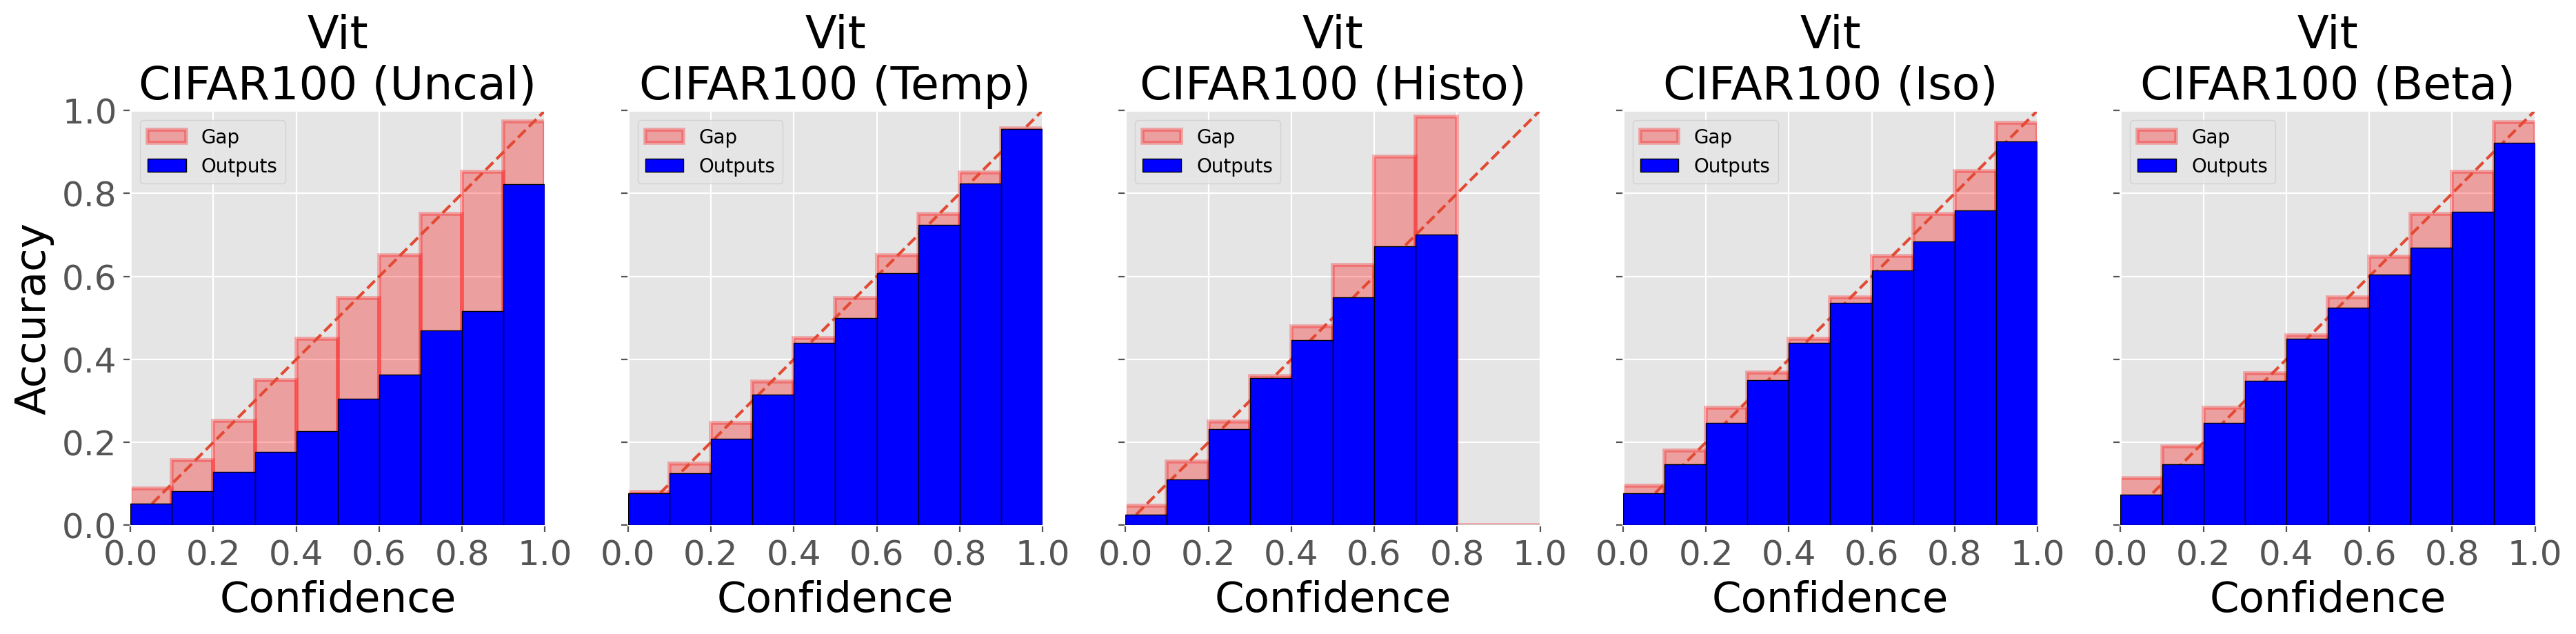

In [157]:
gen_plots(files[:2], plot_names = ["Vit CIFAR100", 
                               ], M = 10, val_set=False)